<a href="https://colab.research.google.com/github/DarshakVasoya/Predicting-Human-Activity/blob/main/Classification_Human_activity_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/Human_Activity_Recognition_Using_Smartphones_Data.csv", sep=',')

In [2]:
data.dtypes.value_counts()
# we have 562 features.

float64    561
object       1
Name: count, dtype: int64

In [3]:
data.dtypes.tail()

angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
dtype: object

In [4]:
# all values are in range -1 to 1
data.iloc[:, :-1].min().value_counts()
# -1 excluding last column

-1.0    561
Name: count, dtype: int64

In [5]:
data.iloc[:, :-1].max().value_counts()

1.0    561
Name: count, dtype: int64

In [6]:
data.Activity.value_counts()

Activity
LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: count, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Activity'] = le.fit_transform(data.Activity)

data['Activity'].sample(5)

9916    5
7271    3
5878    2
4234    1
1948    1
Name: Activity, dtype: int64

In [8]:
# Calculate the correlations between the dependent variables.
# Create a histogram of the correlation values.
# Identify those that are most correlated (either positively or negatively)
feature_cols = data.columns[:-1]
corr_values = data[feature_cols].corr()

In [9]:
# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values)
tril_index
# that all indexes are repating and with themself
# because with themselve is corr's 1 corr(x,x)=1 and corr(x.y) = corr (y.x)

(array([  0,   1,   1, ..., 560, 560, 560]),
 array([  0,   0,   1, ..., 558, 559, 560]))

In [10]:

# Make the unused values NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN
# zip(*) helps us to pass multiple argument
corr_values

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
tBodyAcc-mean()-X,NaN,0.128037,-0.230302,0.004590,-0.016785,-0.036071,0.010303,-0.017488,-0.038805,0.046943,...,0.029901,-0.006179,-0.002255,-0.552989,0.015754,0.036047,0.034296,-0.041021,0.034053,0.030656
tBodyAcc-mean()-Y,NaN,NaN,-0.029882,-0.046352,-0.046996,-0.054153,-0.045247,-0.047673,-0.055524,-0.039445,...,-0.014402,-0.000649,-0.002842,0.077750,-0.027567,0.013241,0.077627,-0.007513,-0.005616,-0.016233
tBodyAcc-mean()-Z,NaN,NaN,NaN,-0.024185,-0.023745,-0.015632,-0.022872,-0.022966,-0.009577,-0.040218,...,-0.015358,0.023050,0.023122,0.055020,-0.042083,-0.066233,-0.030748,0.003215,-0.012986,-0.028406
tBodyAcc-std()-X,NaN,NaN,NaN,NaN,0.922525,0.861910,0.998662,0.916087,0.856497,0.981226,...,-0.068807,0.165552,0.135171,-0.034334,-0.017096,0.027464,-0.027123,-0.374104,0.449425,0.393063
tBodyAcc-std()-Y,NaN,NaN,NaN,NaN,NaN,0.888259,0.918561,0.997510,0.887052,0.911137,...,-0.109941,0.220279,0.191164,-0.020806,-0.006605,0.001902,-0.015784,-0.381391,0.506106,0.425511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"angle(tBodyGyroMean,gravityMean)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.112454,-0.007095,-0.006444,-0.015380
"angle(tBodyGyroJerkMean,gravityMean)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.024822,-0.004582,-0.012549
"angle(X,gravityMean)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.748249,-0.635231
"angle(Y,gravityMean)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.545614


In [11]:
# Stack the data and convert to a data frame
corr_values1 = (corr_values
               .stack().to_frame().reset_index().rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))
corr_values1

,feature1,feature2,correlation
0,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,0.128037
1,tBodyAcc-mean()-X,tBodyAcc-mean()-Z,-0.230302
2,tBodyAcc-mean()-X,tBodyAcc-std()-X,0.004590
3,tBodyAcc-mean()-X,tBodyAcc-std()-Y,-0.016785
4,tBodyAcc-mean()-X,tBodyAcc-std()-Z,-0.036071
...,...,...,...
157075,"angle(tBodyGyroJerkMean,gravityMean)","angle(Y,gravityMean)",-0.004582
157076,"angle(tBodyGyroJerkMean,gravityMean)","angle(Z,gravityMean)",-0.012549
157077,"angle(X,gravityMean)","angle(Y,gravityMean)",-0.748249
157078,"angle(X,gravityMean)","angle(Z,gravityMean)",-0.635231


In [12]:

# Get the absolute values for sorting
corr_values1['abs_correlation'] = corr_values1.correlation.abs()
corr_values1

,feature1,feature2,correlation,abs_correlation
0,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,0.128037,0.128037
1,tBodyAcc-mean()-X,tBodyAcc-mean()-Z,-0.230302,0.230302
2,tBodyAcc-mean()-X,tBodyAcc-std()-X,0.004590,0.004590
3,tBodyAcc-mean()-X,tBodyAcc-std()-Y,-0.016785,0.016785
4,tBodyAcc-mean()-X,tBodyAcc-std()-Z,-0.036071,0.036071
...,...,...,...,...
157075,"angle(tBodyGyroJerkMean,gravityMean)","angle(Y,gravityMean)",-0.004582,0.004582
157076,"angle(tBodyGyroJerkMean,gravityMean)","angle(Z,gravityMean)",-0.012549,0.012549
157077,"angle(X,gravityMean)","angle(Y,gravityMean)",-0.748249,0.748249
157078,"angle(X,gravityMean)","angle(Z,gravityMean)",-0.635231,0.635231


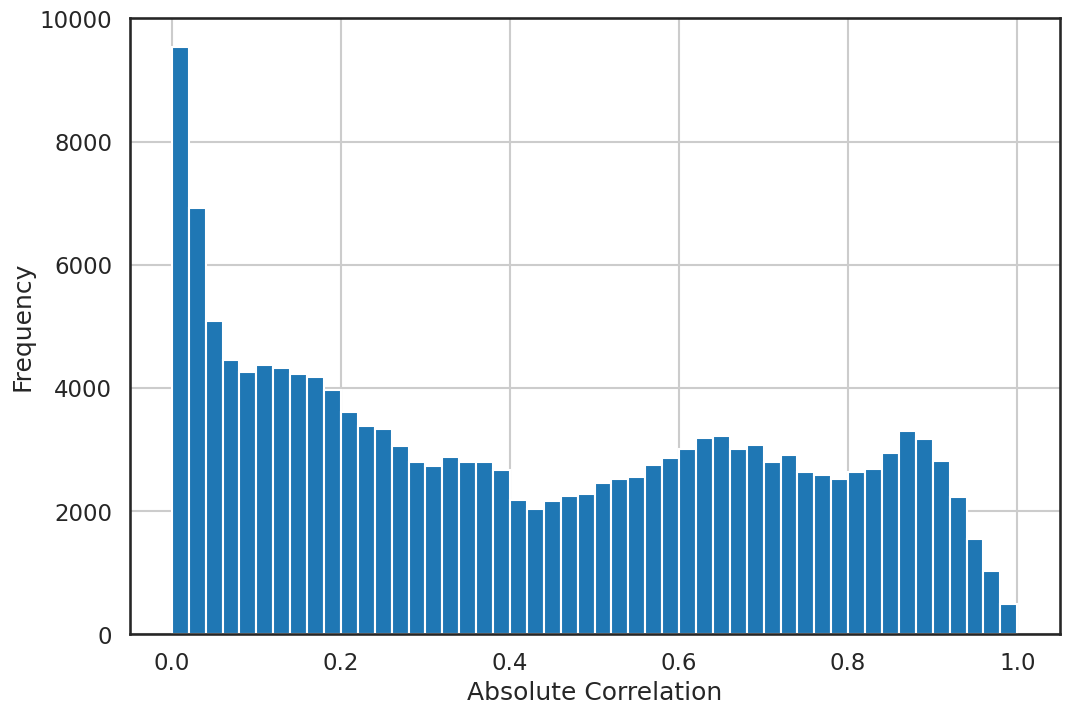

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context('talk')
sns.set_style('white')

ax = corr_values1.abs_correlation.hist(bins=50, figsize=(12, 8))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

In [14]:
# The most highly correlated values
corr_values1.sort_values('correlation', ascending=False).query('abs_correlation>0.8')

,feature1,feature2,correlation,abs_correlation
156894,fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-sma(),1.000000,1.000000
93902,tBodyAccMag-sma(),tGravityAccMag-sma(),1.000000,1.000000
101139,tBodyAccJerkMag-mean(),tBodyAccJerkMag-sma(),1.000000,1.000000
96706,tGravityAccMag-mean(),tGravityAccMag-sma(),1.000000,1.000000
94257,tBodyAccMag-energy(),tGravityAccMag-energy(),1.000000,1.000000
...,...,...,...,...
22657,tGravityAcc-mean()-Y,"angle(Y,gravityMean)",-0.993425,0.993425
39225,"tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4",-0.994267,0.994267
38739,"tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3",-0.994628,0.994628
23176,tGravityAcc-mean()-Z,"angle(Z,gravityMean)",-0.994764,0.994764


In [15]:
# Split the data into train and test data sets. This can be done using any method, but consider using Scikit-learn's StratifiedShuffleSplit to maintain the same ratio of predictor classes.
# Regardless of the method used to split the data, compare the ratio of classes in both the train and test splits.
from sklearn.model_selection import StratifiedShuffleSplit

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1,
                                          test_size=0.3,
                                          random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(data[feature_cols], data.Activity))
# next() is a built-in function used to retrieve the next item from an iterator. It takes an iterator and returns the next item in the sequence. here, it returns indexes..


# Create the dataframes
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'Activity']

X_test  = data.loc[test_idx, feature_cols]
y_test  = data.loc[test_idx, 'Activity']

In [16]:
y_train.value_counts(normalize=True)
# normalize used for showing ratio

Activity
0    0.188792
2    0.185046
1    0.172562
3    0.167152
5    0.149951
4    0.136496
Name: proportion, dtype: float64

In [17]:
y_test.value_counts(normalize=True)

Activity
0    0.188673
2    0.185113
1    0.172492
3    0.167314
5    0.149838
4    0.136570
Name: proportion, dtype: float64

In [18]:
# Fit a logistic regression model without any regularization using all of the features. Be sure to read the documentation about fitting a multi-class model so you understand the coefficient output. Store the model.
# Using cross validation to determine the hyperparameters and fit models using L1 and L2 regularization. Store each of these models as well. Note the limitations on multi-class models, solvers, and regularizations. The regularized models, in particular the L1 model, will probably take a while to fit.

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='liblinear').fit(X_train,y_train)



In [19]:
from sklearn.linear_model import LogisticRegressionCV
lr_L1=LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)
lr_l2= LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)

In [20]:
# Cs: This is the list of regularization parameters (inverse of regularization strength) to try. In your example, Cs=10 means that it will try 10 different values of the regularization parameter.
# cv: This is the number of folds for cross-validation. In your example, cv=4 means it will use 4-fold cross-validation.
# penalty: This specifies the norm used in the penalization. In logistic regression, 'l2' means Ridge regularization is applied.
# solver: This specifies the algorithm to use in the optimization problem. 'liblinear' is suitable for small datasets and supports both L1 and L2 regularization.
# When you instantiate LogisticRegressionCV with these parameters, it will perform logistic regression with cross-validation to find the best regularization parameter (C) using the specified penalty and solver.

In [21]:
# Compare the magnitudes of the coefficients for each of the models. If one-vs-rest fitting was used, each set of coefficients can be plotted separately.

# Combine all the coefficients into a dataframe
coefficients = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_L1, lr_l2]

In [22]:
pd.DataFrame(lr.coef_)
# In logistic regression, the coef_ attribute of the trained model (lr in your case) represents the coefficients of the features in the decision function.
# These coefficients indicate the contribution of each feature to the log-odds of the target variable being in a particular class.
# 0 to 5 is target feature, while o  to 560 is features (not raw).
# here, e.g of coeefienct.. for 0 [feature] to (0,1,2,4,5,6)[target variable's class] , high value(0.76) [4] that means feature 0 contributed highest in class 4 of target variable.


,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,-0.087506,0.014493,0.030187,0.004590,-0.045407,0.003403,0.009355,-0.044016,0.008111,-0.089595,...,-0.116464,-0.171223,-0.173055,-0.061156,0.097655,-0.022132,0.058454,1.599105,-0.374313,-0.188309
1,-0.445226,-0.201046,0.063196,-0.733963,-0.034154,-0.281634,-0.636897,-0.005861,-0.168286,-1.044993,...,-0.113011,0.350405,0.014061,-0.059108,-0.199579,-0.659468,-0.246969,-2.473094,-0.740397,-0.298022
2,0.257963,0.060892,0.245909,-0.352732,-0.451850,-0.085842,-0.384505,-0.435470,-0.154104,-0.142951,...,0.255294,-0.521407,0.192994,0.012841,0.147997,0.550630,0.268995,-0.854612,1.771455,0.416920
3,-0.169284,-0.023509,0.022339,-0.701328,0.260243,-0.001665,-0.519102,0.246585,-0.004434,-0.991873,...,-0.184081,0.521983,0.285926,0.034940,0.064433,-0.234924,-0.162010,-0.313142,-0.242904,0.065047
4,0.765611,0.107967,0.058980,0.266984,-0.516844,-0.397707,0.327282,-0.433985,-0.501475,1.142181,...,0.290589,-0.984019,-0.800609,-0.273109,-0.192798,0.385179,-0.157603,-0.712694,-0.275139,-0.042363
5,-0.080084,-0.247193,-0.402526,0.696120,0.106248,0.199328,0.205285,-0.090402,0.201388,1.023176,...,-0.217004,0.161885,0.393219,0.112673,0.006251,-0.351492,0.174153,0.416311,0.876728,0.438815


In [23]:
lr.coef_

array([[-0.08750646,  0.01449275,  0.03018717, ...,  1.59910474,
        -0.3743129 , -0.18830925],
       [-0.44522579, -0.20104642,  0.06319644, ..., -2.47309433,
        -0.74039711, -0.29802243],
       [ 0.25796346,  0.06089227,  0.24590906, ..., -0.85461225,
         1.77145494,  0.41692016],
       [-0.16928397, -0.02350914,  0.02233883, ..., -0.31314233,
        -0.24290396,  0.06504673],
       [ 0.76561079,  0.10796692,  0.05898045, ..., -0.71269424,
        -0.27513866, -0.04236269],
       [-0.08008393, -0.24719319, -0.40252632, ...,  0.41631134,
         0.87672796,  0.43881541]])

In [24]:
lr.coef_.T

# Taking the transpose of lr.coef_ using .T (transpose) will rearrange the coefficients so that each row represents a feature, and each column represents a class

array([[-0.08750646, -0.44522579,  0.25796346, -0.16928397,  0.76561079,
        -0.08008393],
       [ 0.01449275, -0.20104642,  0.06089227, -0.02350914,  0.10796692,
        -0.24719319],
       [ 0.03018717,  0.06319644,  0.24590906,  0.02233883,  0.05898045,
        -0.40252632],
       ...,
       [ 1.59910474, -2.47309433, -0.85461225, -0.31314233, -0.71269424,
         0.41631134],
       [-0.3743129 , -0.74039711,  1.77145494, -0.24290396, -0.27513866,
         0.87672796],
       [-0.18830925, -0.29802243,  0.41692016,  0.06504673, -0.04236269,
         0.43881541]])

In [25]:
for lab,mod in zip(coeff_labels, coeff_models):
    coeffs = mod.coef_
    coeff_label = pd.MultiIndex(levels=[[lab], [0,1,2,3,4,5]],
                                 codes=[[0,0,0,0,0,0], [0,1,2,3,4,5]])
    coefficients.append(pd.DataFrame(coeffs.T, columns=coeff_label))

coefficients = pd.concat(coefficients, axis=1)

coefficients.sample(10)
#  pd.MultiIndex() constructor, the levels parameter specifies the unique values at each level of the MultiIndex, and the codes parameter specifies the codes or indices that map to these levels.
#  when you create coeff_label with these levels and codes, you're essentially creating a MultiIndex with two levels: the first level labeled with lab and the second level labeled with class labels [0, 1, 2, 3, 4, 5].
#  The codes parameter ensures that these labels are correctly mapped to their corresponding indices in each level.

lr                                                          l1  \
            0         1         2         3         4         5         0   
43   0.176507  0.192096  0.463288  0.213429 -0.400604 -0.095164  0.000000   
284 -0.048060 -0.169294 -0.200082 -0.340027  0.553399  0.385663 -0.168731   
550  0.037795  0.168937  0.256779  0.472359  0.259695  0.389728  0.000000   
421 -0.016517  0.080845  0.063227 -0.273757  0.230458 -0.216544  0.000000   
10   0.007986 -0.779808  0.255057 -0.101341 -0.387749  0.489190  0.000000   
55  -1.260545  2.287107  1.111516  0.094614 -0.975172  0.948330 -3.392951   
140 -0.050614  0.042155 -0.391012  0.393725 -0.176996  0.479578 -0.011718   
348 -0.064602 -0.190042 -0.395608  0.462112 -0.247030 -0.266495  0.000000   
233 -0.046577 -0.059748 -0.283639  0.445114  0.563015 -1.140558  0.000000   
554 -0.061156 -0.059108  0.012841  0.034940 -0.273109  0.112673  0.000000   

                                                             l2            \
            1         2         3         4         5         0         1   
43   0.011351  1.037517  0.001246 -0.213092  0.192457  0.294196  0.194508   
284  0.000000  0.000000  0.000000  1.452393  0.543685 -0.082157  0.622861   
550  0.013634  0.527248  0.484286  0.214463  0.561671  0.081340  0.265072   
421  0.000000  0.000000  0.000000  0.197581 -0.161588 -0.045994  0.216228   
10  -4.143511  0.000000  0.000000 -1.998035  4.656666  0.049266 -4.943830   
55   3.234191  2.300077  0.000000 -3.584924  1.574458 -2.473193  2.880205   
140  0.000000  0.000000  0.476862 -0.409605  1.129036 -0.078466  0.805005   
348  0.000000  0.000000  0.000000 -0.041968 -1.320245 -0.110563 -0.730799   
233  0.000000  0.000000  0.508272  1.511019 -2.055878 -0.082521  0.127314   
554  0.158654  0.000000  0.000000 -0.364760  0.529154 -0.179723  0.659989   

                                             
            2         3         4         5  
43   0.747507  0.674822 -0.929096 -0.549824  
284 -0.277793 -1.193675  1.285463  0.718493  
550  0.429752  1.482587  0.704345  0.565674  
421  0.059615 -0.800295  0.313369 -0.484701  
10   0.615900  0.007130 -0.827252  1.466017  
55   1.742386  0.212135 -1.848802  1.460764  
140 -0.616291  0.906929 -0.295632  0.967995  
348 -0.559324  0.886836 -0.376743 -0.471471  
233 -0.434103  1.294952  1.165664 -2.338838  
554 -0.105429 -0.093736 -0.530122  0.306797

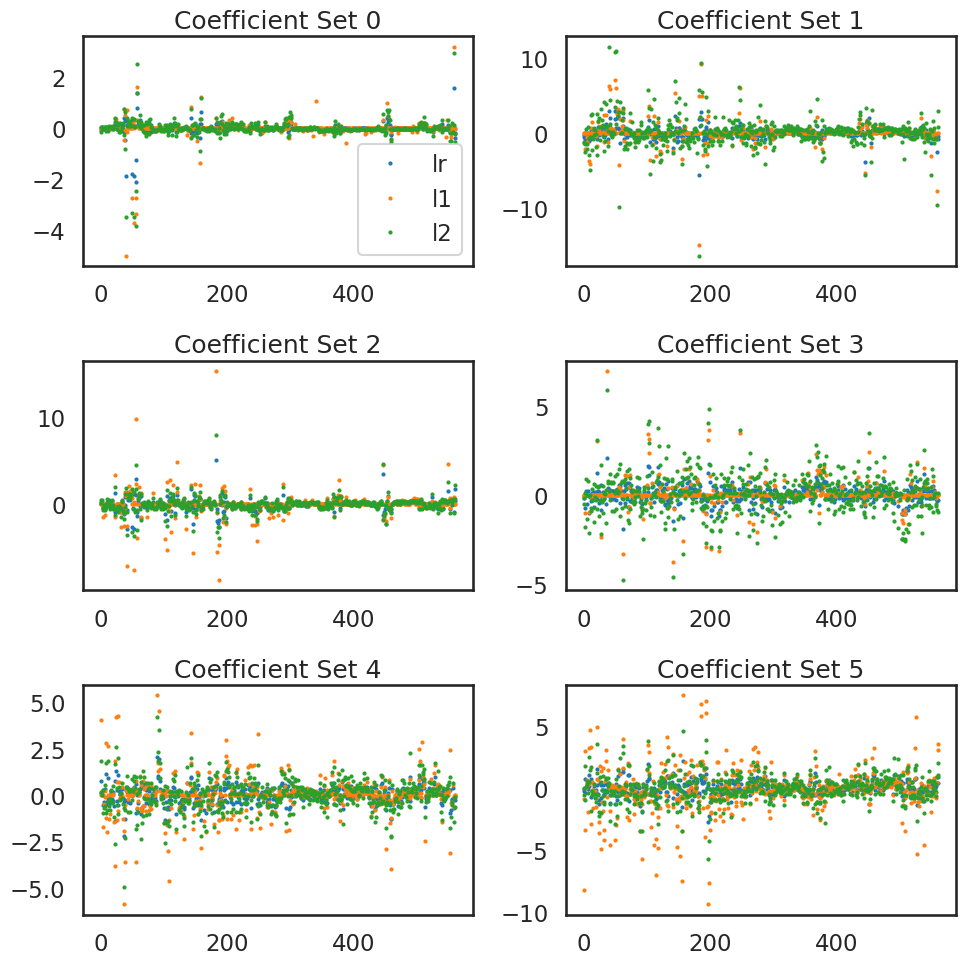

In [28]:
# axList = axList.flatten(): This flattens the array of Axes objects into a 1D array. This is useful if you want to iterate over all the subplots without dealing with the grid structure.
fig, axList = plt.subplots(nrows=3, ncols=2)
axList = axList.flatten()
fig.set_size_inches(10,10)


for ax in enumerate(axList):
    loc = ax[0]
    ax = ax[1]

    data = coefficients.xs(loc, level=1, axis=1)
    data.plot(marker='o', ls='', ms=2.0, ax=ax, legend=False)
#     loc represents the index of the subplot in the grid.
# ax represents the Axes object corresponding to the current subplot.

    if ax is axList[0]:
        ax.legend(loc=4)

    ax.set(title='Coefficient Set '+str(loc))

plt.tight_layout()


#  the xs() method stands for "cross-section" and is used to select data at a particular level or levels of a MultiIndex. It allows you to retrieve a subset of the data based on the values of one or more levels of the MultiIndex.
# So, putting it all together, data = coefficients.xs(loc, level=1, axis=1) selects data from the DataFrame coefficients based on the value of loc(it wil be 0 to 5) at the second level of the MultiIndex(bcz level 1 means [level=0], and 2 means [level=1]), and it selects along the columns (index) of the DataFrame.
# The resulting data DataFrame will contain the subset of data corresponding to the specified location loc.

In [46]:
pd.DataFrame(lr.predict_proba(X_test))
# shows the probability of classes per raw

,0,1,2,3,4,5
0,0.000034,1.683473e-04,5.675965e-04,9.989388e-01,6.320938e-06,2.845350e-04
1,0.000037,3.211746e-07,4.237862e-06,1.425012e-04,1.165035e-02,9.881653e-01
2,0.000036,4.352813e-03,2.962607e-06,9.875916e-01,5.010543e-03,3.006541e-03
3,0.000223,9.813812e-01,1.838390e-02,1.419629e-07,1.192668e-05,1.288314e-12
4,0.998277,1.717725e-03,3.008377e-09,2.088786e-07,5.146975e-06,1.393958e-10
...,...,...,...,...,...,...
3085,0.000038,4.541393e-01,5.434698e-01,2.297535e-03,2.166721e-05,3.359789e-05
3086,0.000089,1.287036e-04,2.437034e-05,9.033540e-01,3.474011e-05,9.636967e-02
3087,0.000024,9.696419e-01,3.032818e-02,4.114978e-09,4.090159e-06,2.039717e-06
3088,0.000055,9.868403e-01,1.224294e-03,2.686226e-07,2.893126e-07,1.187969e-02


In [44]:
# Predict and store the class for each model.
# Store the probability for the predicted class for each model.
y_pred=list()
y_prob=list()

coeff_labels= ['lr','l1','l2']
coeff_models=[lr,lr_L1,lr_l2]
for lab,mod in zip(coeff_labels,coeff_models):
  y_pred.append(pd.Series(mod.predict(X_test),name=lab))
  y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1),name=lab))


y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred.head()
# it shows predicting classes for each raw.
# .max(axis=1): This takes the maximum value along each row (axis=1) of the 2D array.
#  In the context of predicting probabilities, it returns the highest probability for each sample, regardless of the class it corresponds to

,lr,l1,l2
0,3,3,3
1,5,5,5
2,3,3,3
3,1,1,1
4,0,0,0


In [47]:
# we can also see the diffrence between lr and l1..like this
y_pred[y_pred.lr != y_pred.l1]

,lr,l1,l2
88,2,1,1
197,2,1,1
296,1,2,1
388,1,2,1
430,4,5,4
489,2,1,1
769,4,3,3
853,5,3,3
1036,1,2,1
1071,1,2,2


In [48]:
# For each model, calculate the following error metrics:

# Accuracy
# Precision
# Recall
# F-score
# Confusion Matrix

from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize
score(y_test, y_pred[lab], average='weighted')
# it returns average value of all class becaused of "weighted"

(0.9838243714214587, 0.9838187702265372, 0.98381859677489, None)

In [50]:
y_test.head()

7743    3
969     5
3175    3
8907    1
6368    0
Name: Activity, dtype: int64

In [52]:
 label_binarize(y_test, classes=[0,1,2,3,4,5])
#  it converts y_test into binariza array. first is 3, shows 1 at 3 index, all else 0


array([[0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0],
       ...,
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1]])

In [54]:

metrics = list()
cm = dict()

for lab in coeff_labels:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')

    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])

    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1,2,3,4,5]),
              label_binarize(y_pred[lab], classes=[0,1,2,3,4,5]),
              average='weighted')

    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])

    metrics.append(pd.Series({'precision':precision, 'recall':recall,
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc},
                             name=lab))

metrics = pd.concat(metrics, axis=1)
metrics

,lr,l1,l2
precision,0.984144,0.983514,0.983824
recall,0.984142,0.983495,0.983819
fscore,0.984143,0.983492,0.983819
accuracy,0.984142,0.983495,0.983819
auc,0.990384,0.989949,0.990165


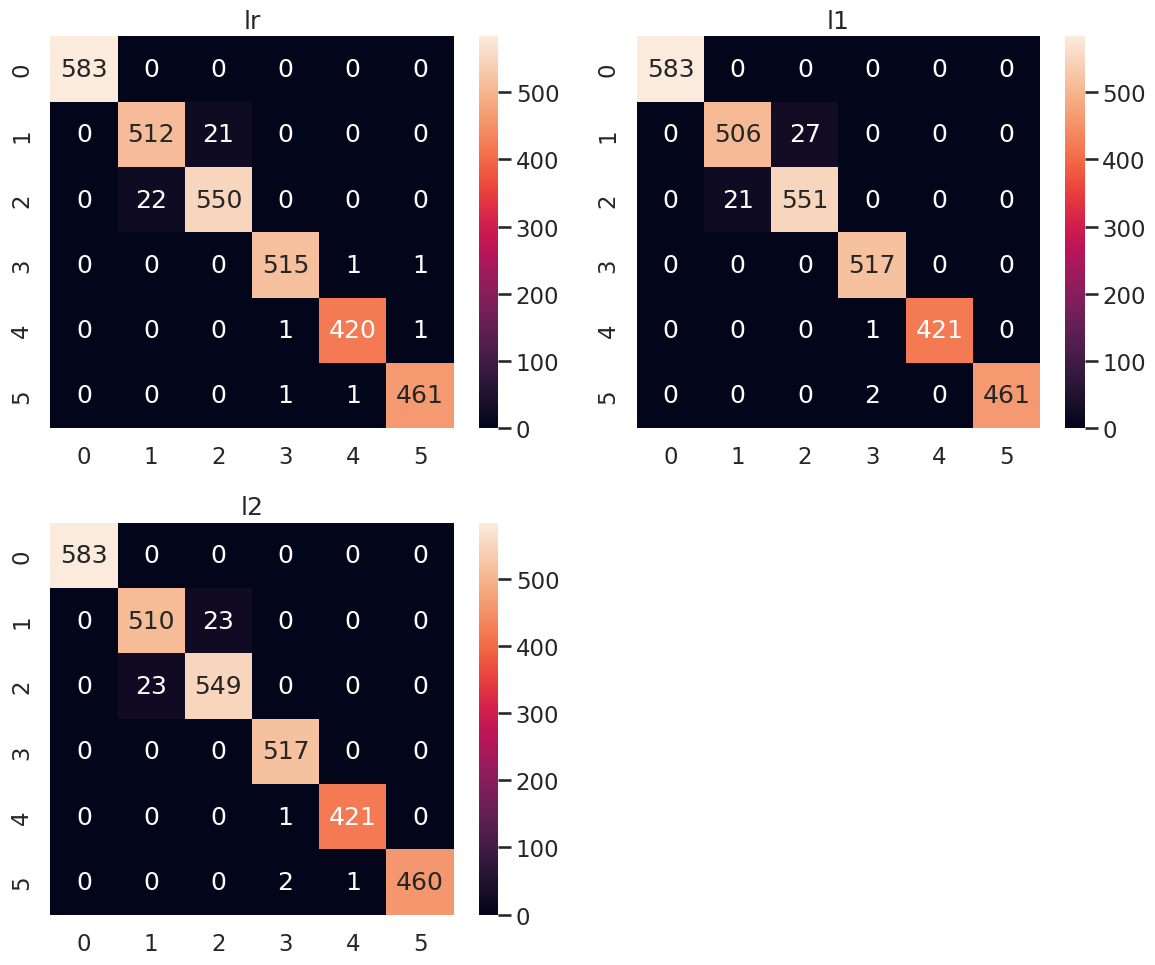

In [55]:
# showing heatmap of confusion matrix for diffrent model
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);

plt.tight_layout()